<a href="https://colab.research.google.com/github/jahnavi1thoom/EDA-week7/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
print("-----first 5 elements----")
print(df.head())
print("-----shape-----")
print(df.shape)
print("-----info-----")
print(df.info())
#missing values analysis
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)
#handlind missing values
#fill numeric missing values with mean
df['age']=df['age'].fillna(df['age'].mean())
#fill categorical missing values with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
#drop 'deck' column
df.drop(columns=['deck'],inplace=True)
print('missing values after cleaning:',df.isnull().sum().sum())
#missing values analysis
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})



#duplicates &data type check
print("duplicate rows:",df.duplicated().sum())

#convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
print(df.info())


-----first 5 elements----
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
-----shape-----
(891, 15)
-----info-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
--- 

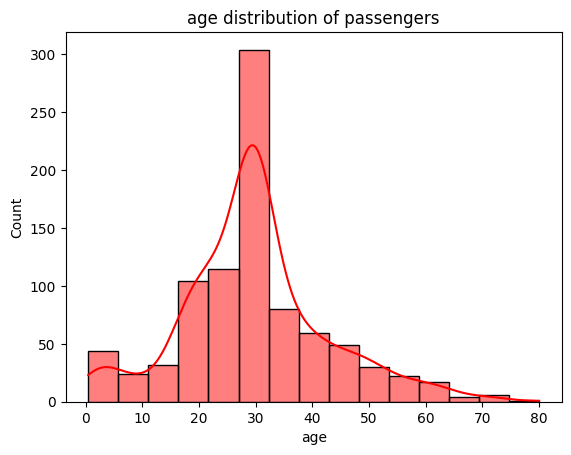

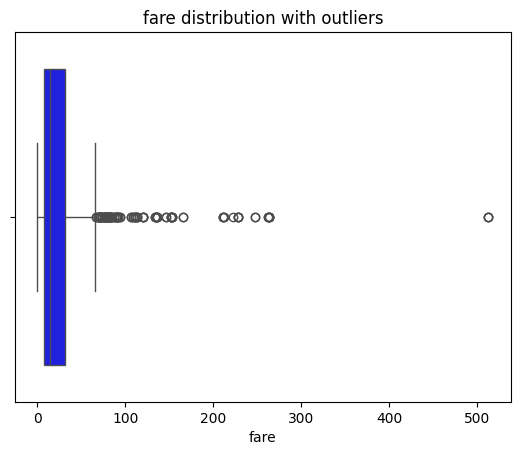

In [ ]:
#univariate analysis-numerical features
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#histogram
sns.histplot(df['age'],bins=15,kde=True,color='red')
plt.title("age distribution of passengers")
plt.show()

#boxplot
sns.boxplot(x=df['fare'],color="blue")
plt.title("fare distribution with outliers")
plt.show()

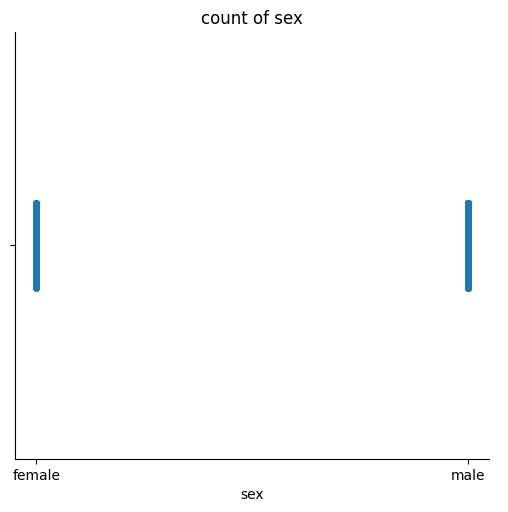

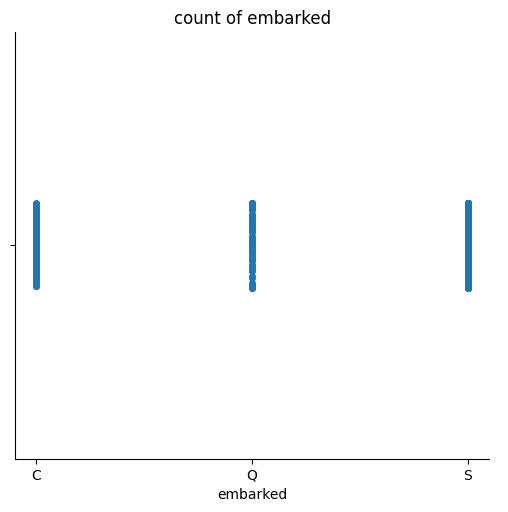

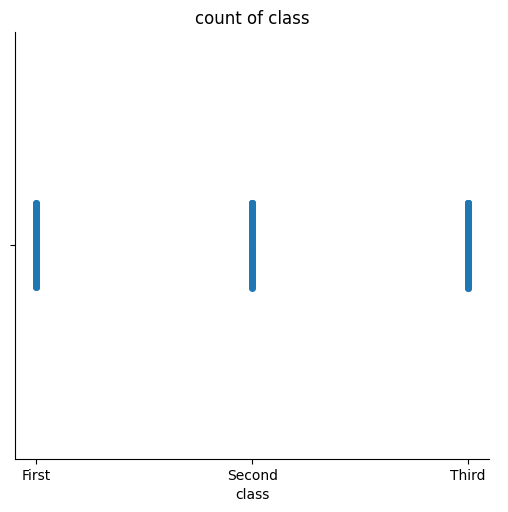

In [ ]:
#univarient:categorical features

cat_clos=df.select_dtypes('category').columns
for col in cat_clos:
  sns.catplot(x=col,data=df)
  plt.title(f"count of {col}")
  plt.show()



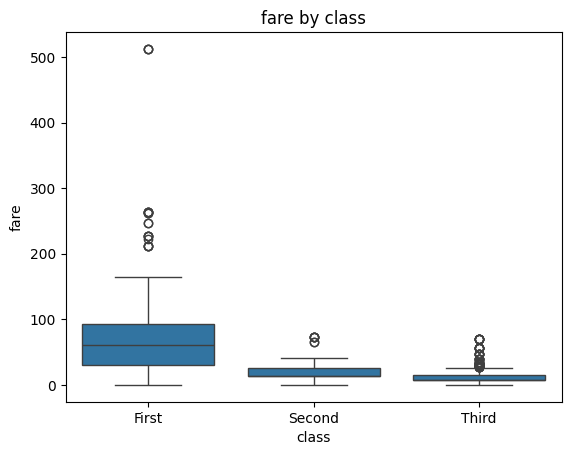

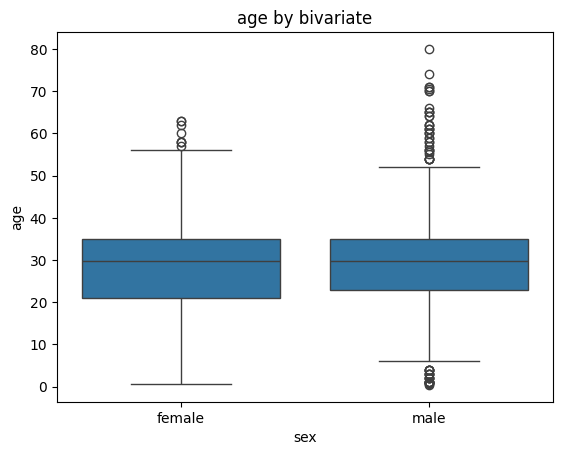

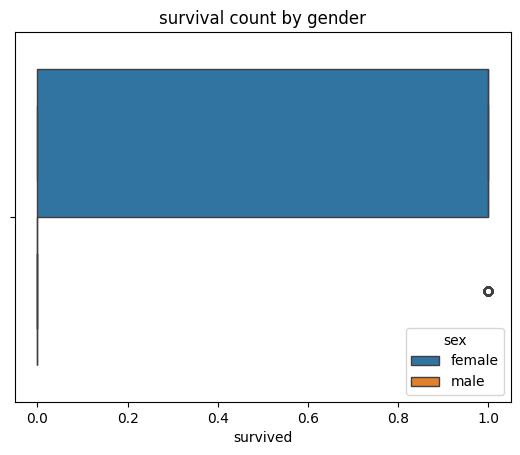

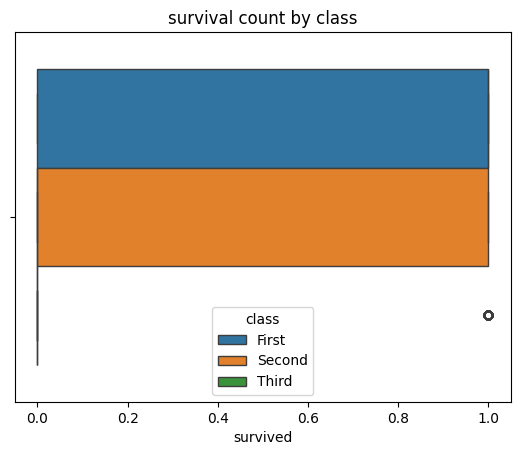

In [ ]:
#bivariate analysis-numerical vs categorical
sns.boxplot(x='class', y='fare',data=df)
plt.title("fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("age by bivariate")
plt.show()



#bivariate analysis-categorical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survival count by gender")
plt.show()
sns.boxplot(x='survived',hue='class',data=df)
plt.title("survival count by class")
plt.show()

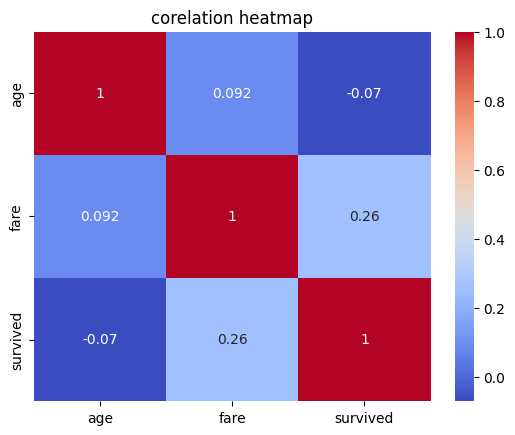

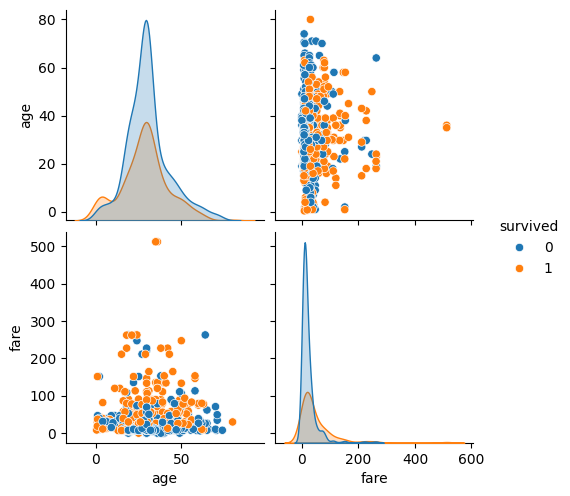

In [ ]:
#corelation and multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("corelation heatmap")
plt.show()



sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

number of outliers in fare: 116


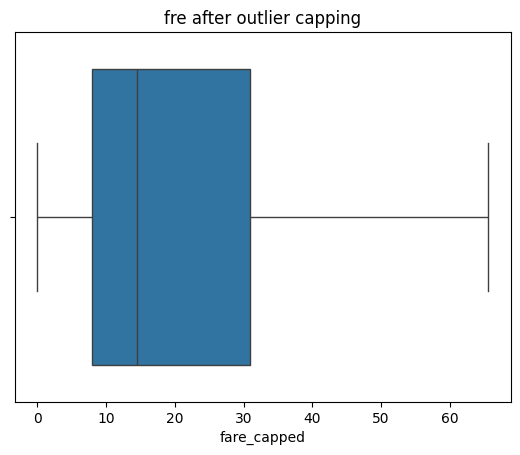

In [ ]:
#outliers detection using IQR
q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers=df[(df['fare']< lower)|(df['fare']>upper)]
print("number of outliers in fare:",len(outliers))


#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fre after outlier capping")
plt.show()


Task 1 — Data Loading, Merging & Initial Inspection
Load all required CSV files into your notebook.
Merge them into one dataset using Store, Dept, and Date.
Display the first and last 10 rows.
Print:
.shape
.info()
.describe()
Identify:
Numerical columns
Categorical columns
Date columns
List all unique store types and departments.
7. Identify which columns may require cleaning or type conversion

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load files
df1 = pd.read_csv('/content/drive/MyDrive/features.csv')
df2 = pd.read_csv('/content/drive/MyDrive/stores.csv')
df3 = pd.read_csv('/content/drive/MyDrive/train.csv')

# Correct merging
temp = pd.merge(df3, df1, on=['Store', 'Date'], how='inner')
merged_df = pd.merge(temp, df2, on='Store', how='inner')
print("----first 10 records-----")
print(merged_df.head(10))
print("<------last 10 records-----")
print(merged_df.tail(10))
print("-----shape---")
print(merged_df.shape)
print("----info-----")
print(merged_df.info())
print("----describe------")
print(merged_df.describe())
#numerical columns
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:\n", numerical_cols)
#categorical columns
categorical_cols=merged_df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)
#date columns
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
date_cols = merged_df.select_dtypes(include=['datetime64']).columns
print("Date Columns:\n", date_cols)
#unique stores
print("Unique Store Types:", merged_df['Type'].unique())
#unique departments
print("Unique dept Types:", merged_df['Dept'].unique())
#7
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        try:
            merged_df[col].astype(float)
            print(col, "→ POSSIBLE numeric column (stored as object)")
        except:
            pass
print(merged_df.isnull().sum())
print("Duplicate rows:", merged_df.duplicated().sum())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
----first 10 records-----
   Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   
5      1     1  2010-03-12      21043.39        False        57.79   
6      1     1  2010-03-19      22136.64        False        54.58   
7      1     1  2010-03-26      26229.21        False        51.45   
8      1     1  2010-04-02      57258.43        False        62.27   
9      1     1  2010-04-09      42960.91        False        65.86   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0 

Task 2 — Data Cleaning
Identify missing values using .isnull().sum().
Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.
Fill missing markdown-related fields with mean values.
Convert Date column to datetime format.
Remove duplicate rows.
Reset the index after cleaning.

In [ ]:
print(merged_df.isnull().sum())
#fill missing numeric  values
num_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in num_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
#fill missing markdown values
for col in markdown_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(merged_df[col].mean())
        #date column to determine format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
#remove duplicate rows
merged_df = merged_df.drop_duplicates()
#reset index
merged_df = merged_df.reset_index(drop=True)


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


Task 3 — Outlier Detection & Treatment
Detect outliers in:
Weekly_Sales
Temperature
Fuel_Price
CPI
Use:
Boxplots
IQR method
Identify if extreme sales spikes occur during holiday weeks.
Decide which outliers should be:
Removed
Capped
Kept as business outliers

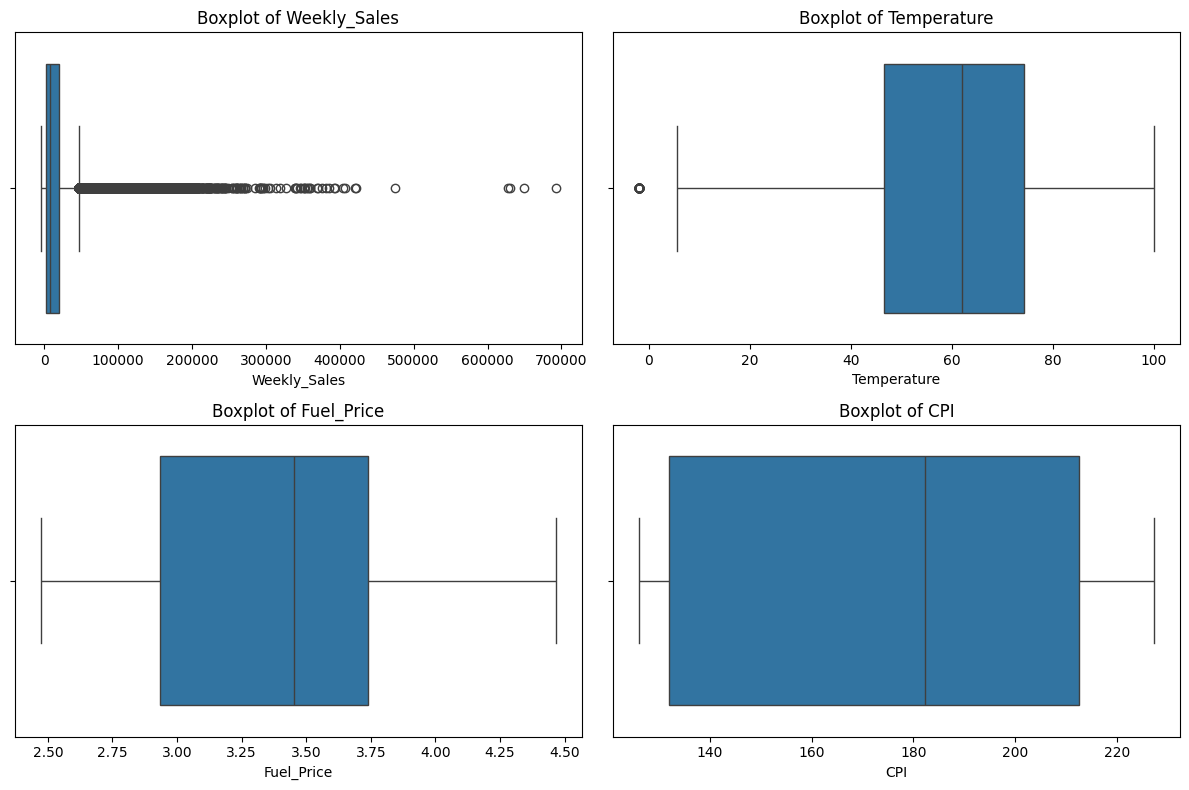


Column: Weekly_Sales
  Lower bound: -25109.653749999998
  Upper bound: 47395.15625
  Number of outliers: 35521

Column: Temperature
  Lower bound: 5.279999999999994
  Upper bound: 115.68
  Number of outliers: 69

Column: Fuel_Price
  Lower bound: 1.7254999999999996
  Upper bound: 4.9455
  Number of outliers: 0

Column: CPI
  Lower bound: 11.431177550000001
  Upper bound: 333.00848195000003
  Number of outliers: 0

Total Weekly_Sales outliers: 35521

Original rows: 421570
Rows after removing extreme outliers (but keeping NaNs and holiday spikes): 385981

Capped columns created: Weekly_Sales_capped, Temperature_capped, Fuel_Price_capped, CPI_capped


KeyError: "['IsHoliday'] not in index"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Columns to check
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI']

# --- 1) Boxplots (visual) ---
plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=merged_df[col].dropna())
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# --- 2) IQR function that handles NaNs safely ---
def detect_outliers(df, col):
    s = df[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers, lower, upper

# Compute bounds and counts for each column once and print
bounds = {}
for col in cols:
    outliers, lower, upper = detect_outliers(merged_df, col)
    bounds[col] = (lower, upper)
    print(f"\nColumn: {col}")
    print(f"  Lower bound: {lower}")
    print(f"  Upper bound: {upper}")
    print(f"  Number of outliers: {len(outliers)}")

# --- 3) Weekly_Sales outliers and holiday spikes ---
sales_outliers, ws_lower, ws_upper = detect_outliers(merged_df, 'Weekly_Sales')
print("\nTotal Weekly_Sales outliers:", len(sales_outliers))

# Check holiday spikes among those outliers
if 'IsHoliday' in merged_df.columns:
    holiday_spikes = sales_outliers[sales_outliers['IsHoliday'] == True]
    print("Weekly_Sales outliers that are holiday weeks:", len(holiday_spikes))
    display(holiday_spikes[['Store','Dept','Date','Weekly_Sales','IsHoliday']].head(20))
else:
    print("Warning: 'IsHoliday' column not found in merged_df — cannot check holiday spikes.")
    holiday_spikes = merged_df.iloc[0:0]  # empty DataFrame

# --- 4) Create cleaned_df by REMOVING non-holiday extreme outliers
# We'll keep rows that fall WITHIN IQR bounds for ALL columns.
# If a column was NaN for a row, we keep that row (so we don't drop rows due to NaNs).
mask = pd.Series(True, index=merged_df.index)

for col in cols:
    lower, upper = bounds[col]
    # Keep rows where:
    #  - value is NaN (we don't remove rows just because value missing)
    #  - OR value is between lower and upper bounds (inclusive)
    mask_col = merged_df[col].isna() | ( (merged_df[col] >= lower) & (merged_df[col] <= upper) )
    mask &= mask_col

cleaned_df = merged_df[mask].copy()

print(f"\nOriginal rows: {len(merged_df)}")
print(f"Rows after removing extreme outliers (but keeping NaNs and holiday spikes): {len(cleaned_df)}")

# --- 5) OPTIONAL: If you want to keep holiday spikes even if they are outside bounds,
# they are already kept because the mask above keeps NaNs and in many cases holiday rows.
# But to be certain: re-include all holiday rows (if IsHoliday exists)
if 'IsHoliday' in merged_df.columns:
    cleaned_df = pd.concat([cleaned_df, merged_df[merged_df['IsHoliday'] == True]]).drop_duplicates().reset_index(drop=True)
    print("After ensuring all holiday rows are included, rows:", len(cleaned_df))

# --- 6) Example: create capped columns instead of removing (useful for models)
merged_df['Weekly_Sales_capped'] = merged_df['Weekly_Sales'].clip(ws_lower, ws_upper)
for col in ['Temperature','Fuel_Price','CPI']:
    lo, hi = bounds[col]
    merged_df[col + '_capped'] = merged_df[col].clip(lo, hi)

print("\nCapped columns created: Weekly_Sales_capped, Temperature_capped, Fuel_Price_capped, CPI_capped")
display(merged_df[['Weekly_Sales','Weekly_Sales_capped','IsHoliday']].head(10))

# cleaned_df is the DataFrame with outliers removed (per above logic)
# merged_df contains original + capped columns (good for modelling experiments)



In [ ]:
print(df1.columns)   # features.csv
print(df2.columns)   # stores.csv
print(df3.columns)   # train.csv


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
